<a href="https://colab.research.google.com/github/Tina-Mulu/Road-Accidents-Analysis-in-Kenya/blob/main/Copy_of_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize']=[12.0, 8.0]

In [ ]:
# Reading our csv
df1 = pd.read_excel('/content/tweet_locations.xlsx')

In [ ]:
# Preview head
df1.head() 

,Unnamed: 0,Index,date,tweet,tidy_tweets,absolute_tidy_tweets,Types,Involving,Injuries,Deaths,Causes,day,month,year,day_of_week,new_time,report_hour,time_slot,location
0,0,0,2021-06-17 05:47:09,08:47 As reported:- Accident ole dume road car...,08:47 As reported:- Accident ole dume road car...,As reported Accident ole dume road car hit nd...,unknown,car,unknown,unknown,unknown,17,6,2021,Thursday,1900-01-01 08:47:09,8,Morning,ole dume road
1,1,1,2021-06-16 13:03:09,16:03 Freak accident involving a Wonderjoy tra...,16:03 Freak accident involving a Wonderjoy tra...,Freak accident involving a Wonderjoy trailer ...,freak,truck,unknown,unknown,unknown,16,6,2021,Wednesday,1900-01-01 16:03:09,16,Evening,kiambu road
2,2,2,2021-06-16 13:02:39,16:02 Freak accident involving a Wonderjoy tra...,16:02 Freak accident involving a Wonderjoy tra...,Freak accident involving a Wonderjoy trailer ...,freak,truck,unknown,unknown,unknown,16,6,2021,Wednesday,1900-01-01 16:02:39,16,Evening,kiambu road
3,3,3,2021-06-16 11:03:09,14:03 @KenyaPower_Care accident along mbagathi...,14:03 accident along mbagathi way has caused p...,accident along mbagathi way has caused power ...,unknown,unknown,unknown,unknown,unknown,16,6,2021,Wednesday,1900-01-01 14:03:09,14,After Noon,mbagathi way
4,4,4,2021-06-16 10:54:39,"13:54 A Very Bad accident at Lukenya, a driver...","13:54 A Very Bad accident at Lukenya, a driver...",A Very Bad accident at Lukenya a driver survi...,bad,unknown,unknown,unknown,unknown,16,6,2021,Wednesday,1900-01-01 13:54:39,13,After Noon,lukenya


In [ ]:
# Shape of dataset
df1.shape

(7113, 19)

In [ ]:
# Checking for null values
df1.isna().sum()

Unnamed: 0                 0
Index                      0
date                       0
tweet                      0
tidy_tweets                0
absolute_tidy_tweets       0
Types                      0
Involving                  0
Injuries                   0
Deaths                     0
Causes                     0
day                        0
month                      0
year                       0
day_of_week                0
new_time                   0
report_hour                0
time_slot                  0
location                1067
dtype: int64

In [ ]:
# Checking for duplicates by finding unique tweets
df1.absolute_tidy_tweets.nunique()

6503

In [ ]:
# drop
df1.drop_duplicates(subset=['absolute_tidy_tweets'], keep='last', inplace=True)

In [ ]:
# Filling null entries with 'unspecified' as a location
df1['location']=df1['location'].fillna('unspecified')

In [ ]:
import calendar

# Adding column containing the names of the respective months
df1['month'] = df1['month'].apply(lambda x: calendar.month_name[x])

In [ ]:
df1.drop(['Unnamed: 0','tweet',	'tidy_tweets','Index', 'new_time'], axis=1, inplace=True)

In [ ]:
df1.head()

,date,absolute_tidy_tweets,Types,Involving,Injuries,Deaths,Causes,day,month,year,day_of_week,report_hour,time_slot,location
0,2021-06-17 05:47:09,As reported Accident ole dume road car hit nd...,unknown,car,unknown,unknown,unknown,17,June,2021,Thursday,8,Morning,ole dume road
2,2021-06-16 13:02:39,Freak accident involving a Wonderjoy trailer ...,freak,truck,unknown,unknown,unknown,16,June,2021,Wednesday,16,Evening,kiambu road
3,2021-06-16 11:03:09,accident along mbagathi way has caused power ...,unknown,unknown,unknown,unknown,unknown,16,June,2021,Wednesday,14,After Noon,mbagathi way
4,2021-06-16 10:54:39,A Very Bad accident at Lukenya a driver survi...,bad,unknown,unknown,unknown,unknown,16,June,2021,Wednesday,13,After Noon,lukenya
5,2021-06-16 08:32:39,Nguumasumba waroad Makueni County MCA is dead...,unknown,unknown,unknown,unknown,unknown,16,June,2021,Wednesday,11,Morning,mombasa road


In [ ]:

df1.loc[df1['Injuries']!='unknown', 'Injuries'] = 'known'

In [ ]:
# Standardizing the entries in the Involving column
df1['Involving'] = df1['Involving'].replace(["boda", "motorbike"], "motorcycle")
df1['Involving'] = df1['Involving'].replace(["car", "severalcars", "saloon", ""], "cars")
df1['Involving'] = df1['Involving'].replace("lorry", "truck")
df1['Involving'] = df1['Involving'].replace("matatu", "psv")
df1['Involving'] = df1['Involving'].replace("tuk-tuk", "tuktuk")



In [ ]:
df1['Types'] = df1['Types'].replace('simpleaccident.', "simple")
df1['Types'] = df1['Types'].replace('terribleaccident', "terrible")
df1['Types'] = df1['Types'].replace("multipleaccident", "multiple")


In [ ]:
df1.loc[df1['Deaths']!='unknown', 'Deaths'] = 'known'

In [ ]:
# matplotlib.rcParams['figure.figsize']=[12.0, 8.0]

In [ ]:
# create a function that plots bar graphs for the frequencies of values in a specified column
def bar(column, xlabel, title, pictitle): 

  sns.set_style('whitegrid')
  ax= df1[column].value_counts(normalize=True).plot.bar(color= 'purple')
  ax.set_ylabel('Frequency', fontdict={'size': 18})
  ax.set_xlabel(f"{xlabel}", fontsize= 18)
  plt.xticks(rotation= 45, fontsize= 12)
  ax.set_title(f"Distribution of Accidents by {title}" , fontsize= 20)
  plt.savefig(title)
  plt.show()

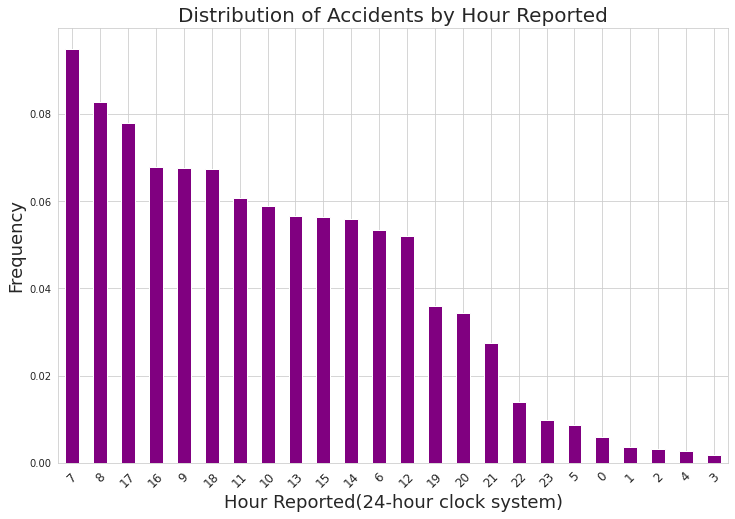

In [ ]:
bar('report_hour', "Hour Reported(24-hour clock system)", "Hour Reported", "Report_hour.png")

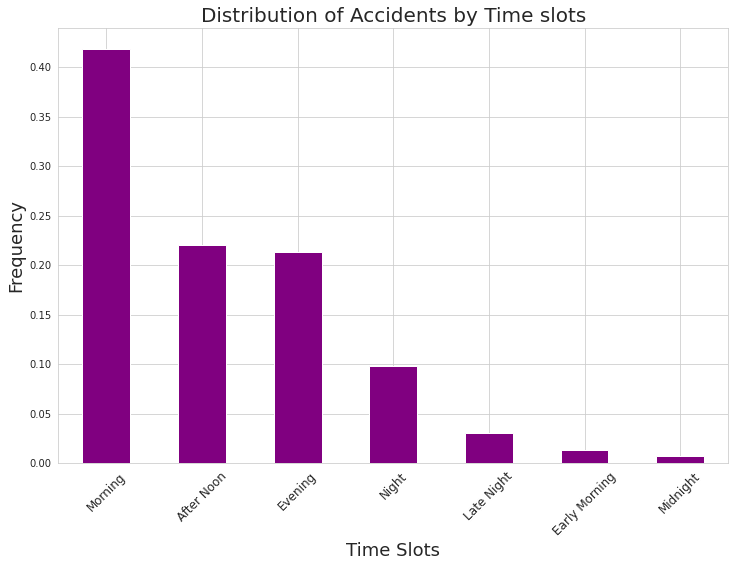

In [ ]:
bar('time_slot', "Time Slots", "Time slots", 'time_slot.png')

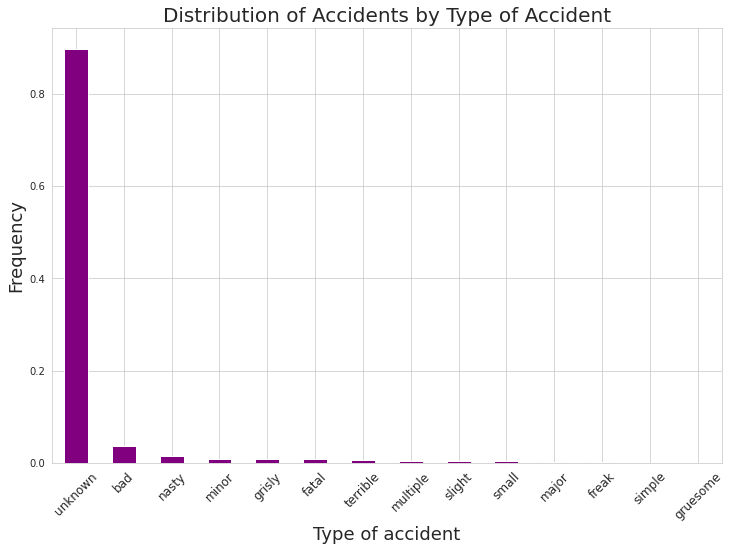

In [ ]:
bar('Types', "Type of accident", "Type of Accident", "type.png")

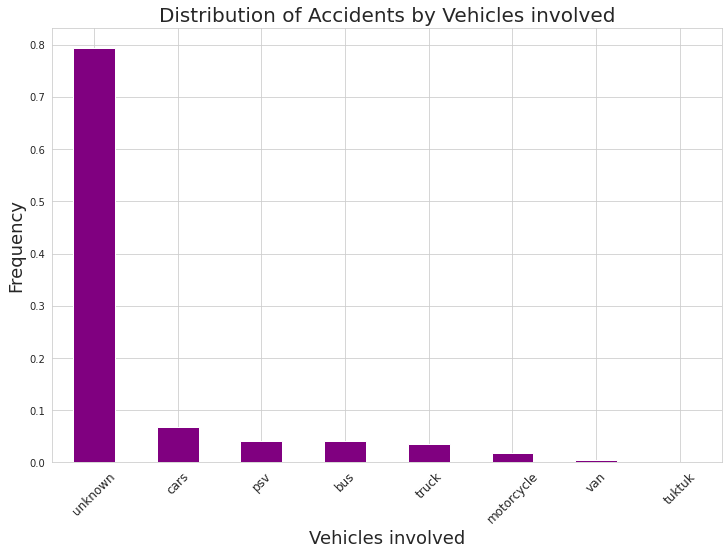

In [ ]:
bar('Involving', 'Vehicles involved', "Vehicles involved", "Involving.png")

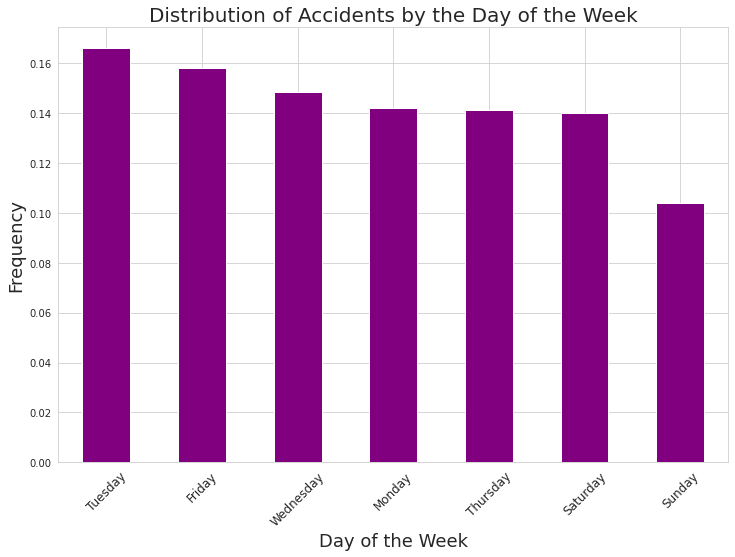

In [ ]:
bar('day_of_week', 'Day of the Week', "the Day of the Week", "day_of_week.png")

In [ ]:
# create a dataframe that contains the value counts of each month
df_date =pd.DataFrame(df1['date'])

df_date['date'] = df_date['date'].dt.strftime('%Y-%m')

df_date = pd.value_counts(df_date.date).reset_index()
df_date.columns = ['date', 'frequency']

df_date['date'] = pd.to_datetime(df_date['date'])

df_date = df_date.set_index('date')

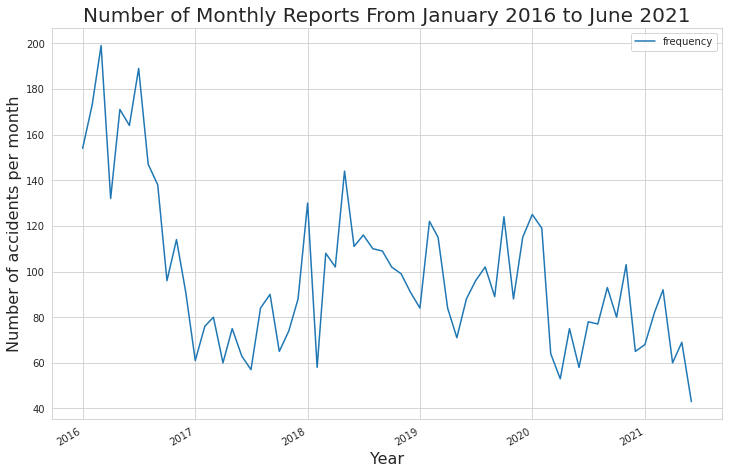

In [ ]:
# plot a line graph for accident reports per month

df_date.plot()
plt.title('Number of Monthly Reports From January 2016 to June 2021', fontsize='20')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of accidents per month', fontsize=16)
plt.savefig('year_line.png')
plt.show()

In [ ]:
# Creating a function that plots a pie chart for values in specified columns 

def pie(column, color, explode, title):
  # Finding the count of values of the elements in 'time_slot' column
  slot= column.value_counts()

  # Assigning the columns to 'element' and 'size' variables
  element = slot.values
  size = slot.index

  # Specifying the colors of the pie chart
  colors=color

  # explode
  expolde=explode

  # plotting the pie chart
  plt.figure(figsize = (5,5), dpi = 100)
  plt.pie(element, colors=colors, explode=explode, autopct ='%1.1f%%', shadow =True, startangle = 90)
  plt.axis('equal')
  plt.title(f'Distribution of {title}')
  plt.legend(size, title=title,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1,))
  plt.show()



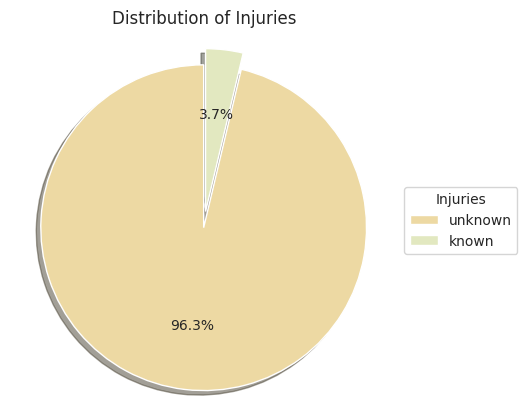

In [ ]:
pie(df1['Injuries'], ('#EDD9A3', '#E2E8C0'), (0.0, 0.1), "Injuries")

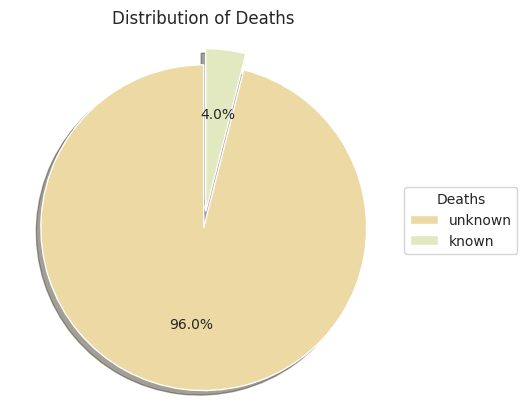

In [ ]:
pie(df1['Deaths'], ('#EDD9A3', '#E2E8C0'), (0.0, 0.1),"Deaths")

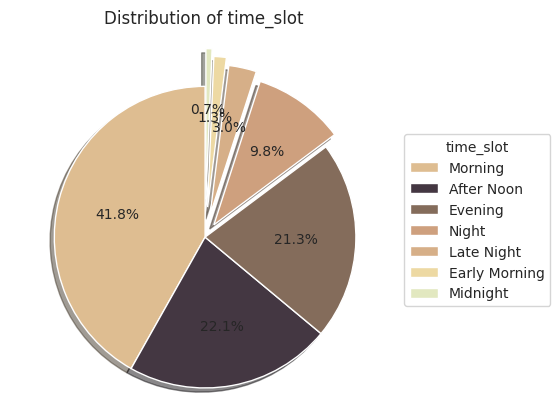

In [ ]:
pie(df1['time_slot'], ('#DEBD91', '#443742', '#846C5B', '#CEA07E', '#D6AF88', '#EDD9A3', '#E2E8C0'), (0, 0, 0, 0.1, 0.15, 0.2, 0.25), "time_slot")


In [ ]:
# create a function that plots bar graphs for the frequencies of the top 10 accident locations per specified year

def bar_year_location(year, title_year, pictitle): 

  sns.set_style('whitegrid')
  ax= plt.subplots(figsize= (10, 8))
  ax= df1[df1['year']==year]['location'].value_counts(normalize=True).head(10).plot.bar(color= 'purple')
  ax.set_ylabel('Frequency', fontdict={'size': 18})
  ax.set_xlabel('Location', fontsize= 18)
  plt.xticks(rotation= 45, fontsize= 14)
  ax.set_title(f"Frequencies of Top 10 Accident Locations in {title_year} " , fontsize= 20)
  plt.savefig(pictitle, bbox_inches="tight")
  plt.show()


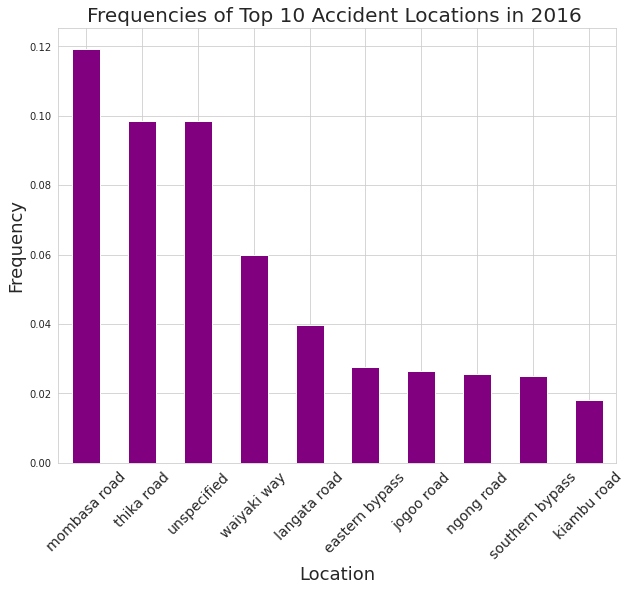

In [ ]:
bar_year_location(2016, "2016", '2016.png')

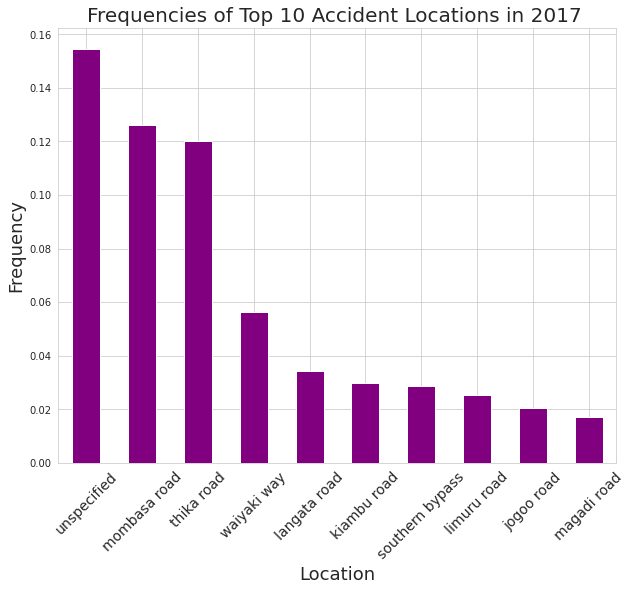

In [ ]:
bar_year_location(2017, "2017", '2017.png')

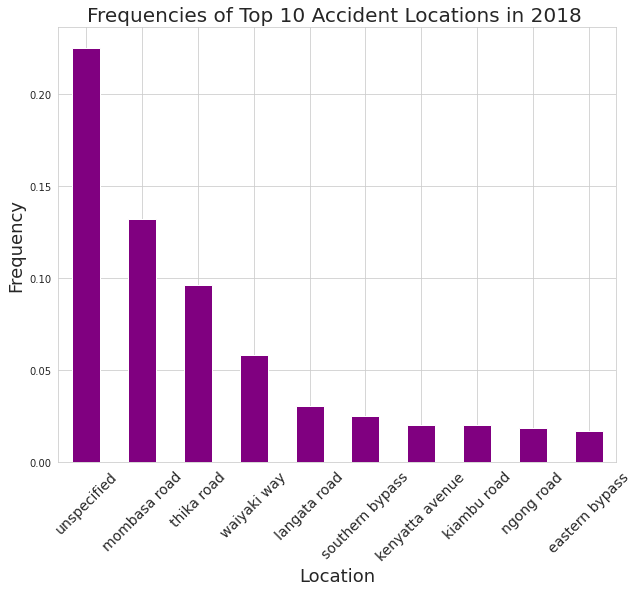

In [ ]:
bar_year_location(2018, "2018", '2018.png')

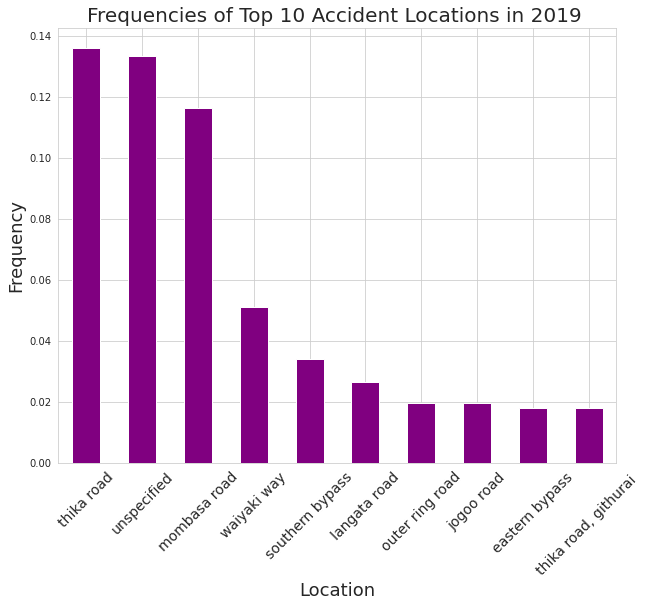

In [ ]:
bar_year_location(2019, "2019", '2019.png')

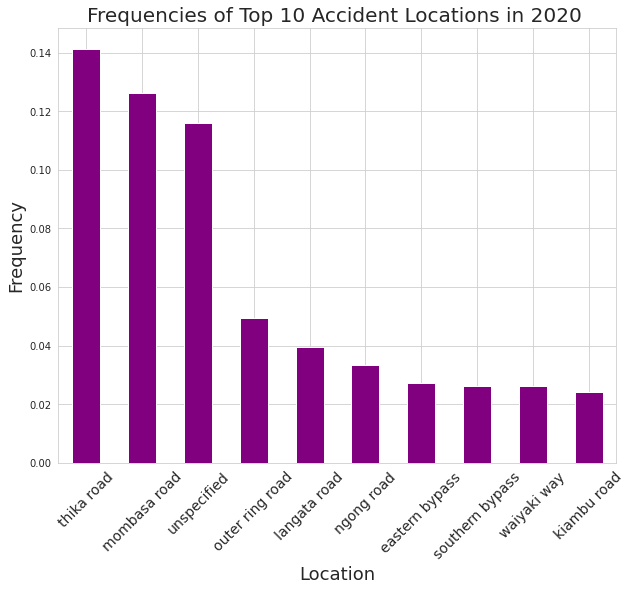

In [ ]:
bar_year_location(2020, "2020", '2020.png')

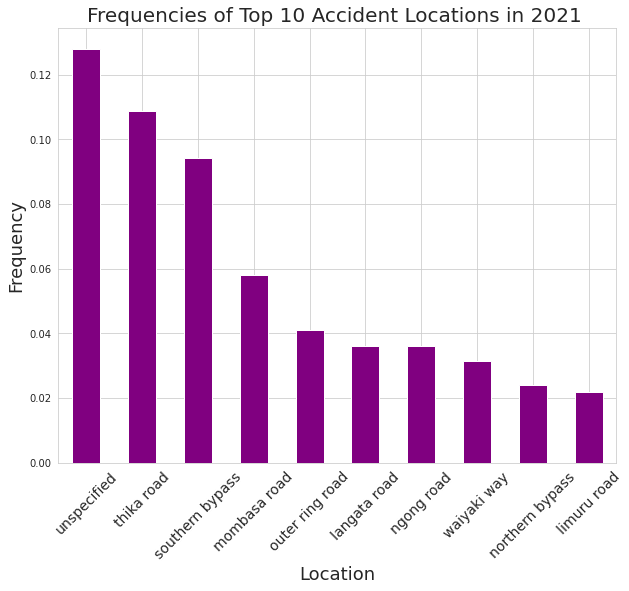

In [ ]:
bar_year_location(2021, "2021", '2021.png')